Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



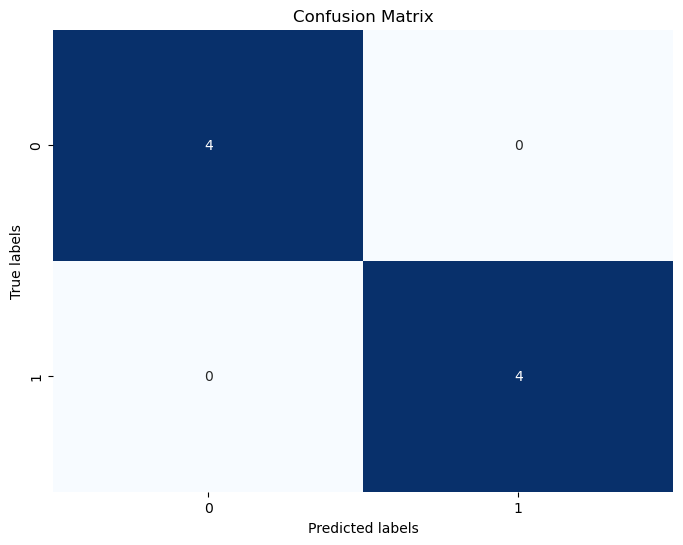

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load your training and testing datasets
train_data = pd.read_csv("G:\\train.csv")
test_data = pd.read_csv("G:\\test.csv")

# Preprocessing - Drop problematic columns if needed
# Specify the actual column names to drop, or remove these lines if not needed
columns_to_drop = ['column_name_1', 'column_name_2']
train_data = train_data.drop(columns=columns_to_drop, errors='ignore')
test_data = test_data.drop(columns=columns_to_drop, errors='ignore')

# Separate features and target variable for training data
X_train = train_data.drop(columns=['class'])
y_train = train_data['class']

# Separate features and target variable for testing data
X_test = test_data.drop(columns=['class'])
y_test = test_data['class']

# Encode target variable into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Define Random Forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train_encoded)

# Make predictions on the testing data
y_pred_encoded = model.predict(X_test)

# Decode the predicted labels back to original string representations
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Generate classification report
report = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy and classification report
print("Accuracy:", accuracy)
print(report)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


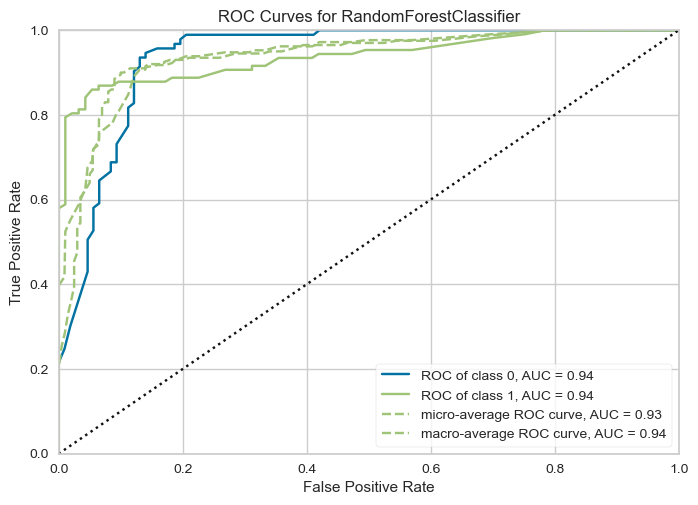

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from yellowbrick.classifier import ROCAUC

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Instantiate the visualizer with the Random Forest classifier
visualizer = ROCAUC(model, classes=['0', '1'], micro=True, macro=True)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw the ROC curve and AUC
visualizer.show()


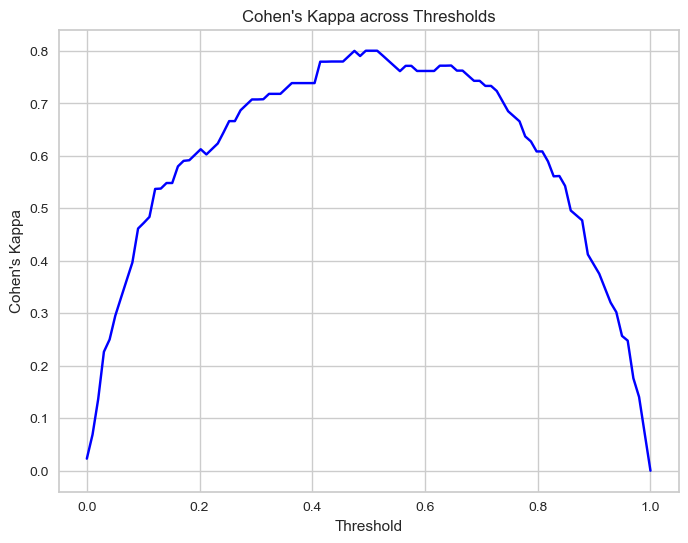

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_pred_threshold = (model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


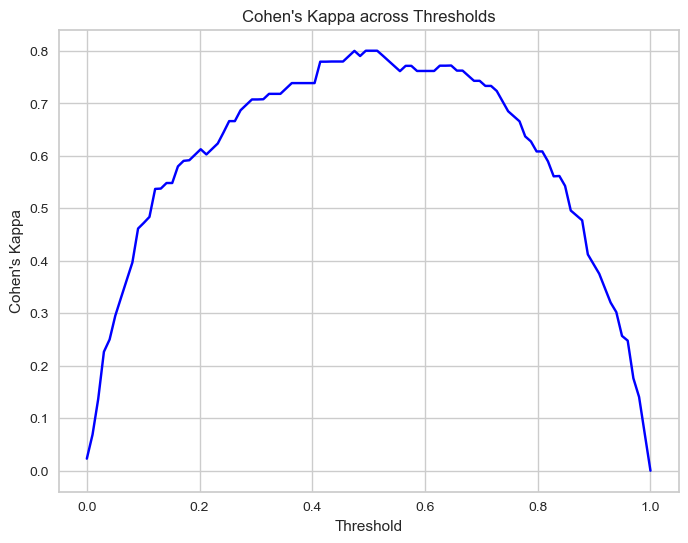

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifier (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)
kappas = []

# Calculate Cohen's Kappa for each threshold
for threshold in thresholds:
    y_probs = model.predict_proba(X_test)[:, 1]  # Probability of positive class
    y_pred_threshold = (y_probs > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    kappas.append(kappa)

# Plot Cohen's Kappa across thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, kappas, color='blue')
plt.title("Cohen's Kappa across Thresholds")
plt.xlabel("Threshold")
plt.ylabel("Cohen's Kappa")
plt.grid(True)
plt.show()


In [2]:
import numpy as np
from sklearn.metrics import cohen_kappa_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your classifiers (AdaBoostClassifier and RandomForestClassifier)
ada_model = AdaBoostClassifier(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Fit both models
ada_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Varying thresholds
thresholds = np.linspace(0, 1, 100)

# Calculate Cohen's Kappa for each threshold for AdaBoostClassifier
ada_kappas = []
for threshold in thresholds:
    y_pred_threshold = (ada_model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    ada_kappas.append(kappa)

# Calculate Cohen's Kappa for each threshold for RandomForestClassifier
rf_kappas = []
for threshold in thresholds:
    y_pred_threshold = (rf_model.predict_proba(X_test)[:, 1] > threshold).astype(int)
    kappa = cohen_kappa_score(y_test, y_pred_threshold)
    rf_kappas.append(kappa)

# Find the threshold with maximum Cohen's Kappa for AdaBoostClassifier
max_ada_kappa_index = np.argmax(ada_kappas)
max_ada_kappa_threshold = thresholds[max_ada_kappa_index]
max_ada_kappa_value = ada_kappas[max_ada_kappa_index]

# Find the threshold with maximum Cohen's Kappa for RandomForestClassifier
max_rf_kappa_index = np.argmax(rf_kappas)
max_rf_kappa_threshold = thresholds[max_rf_kappa_index]
max_rf_kappa_value = rf_kappas[max_rf_kappa_index]

print("Maximum Cohen's Kappa for AdaBoostClassifier:")
print("Threshold:", max_ada_kappa_threshold)
print("Value:", max_ada_kappa_value)

print("\nMaximum Cohen's Kappa for RandomForestClassifier:")
print("Threshold:", max_rf_kappa_threshold)
print("Value:", max_rf_kappa_value)


C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Maximum Cohen's Kappa for AdaBoostClassifier:
Threshold: 0.494949494949495
Value: 0.7280966767371602

Maximum Cohen's Kappa for RandomForestClassifier:
Threshold: 0.494949494949495
Value: 0.8004191198483185
